In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn.utils import clip_grad_norm_
from torch.autograd import Variable
from torchsummary import summary

from torchvision.utils import save_image
from IPython.core.display import Image, display

import numpy as np
import matplotlib.pyplot as plt
from VAE.model import *
from VAE.data import *
from MDN_RNN.model import *

/tmp/ipykernel_6815/103143013.py:9: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython.display
  from IPython.core.display import Image, display


device cuda is ready


In [8]:
z = np.load("Z_ROBO.npy")
print(z.shape)
z = torch.from_numpy(z)

(9, 1000, 32, 4, 4)


In [9]:
vae = VAE(32, batch_size=1).to(DEVICE)
vae.load_state_dict(torch.load('/home/qwest/project/PycharmProjects/Reinforsment_Learning/VAE/ROBOT.pt', weights_only=True))
vae.eval()

VAE(
  (encoder): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(2, 2), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(2, 2), bias=False)
    (3): LeakyReLU(negative_slope=0.2, inplace=True)
    (4): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(2, 2), bias=False)
    (5): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): LeakyReLU(negative_slope=0.2, inplace=True)
    (7): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(2, 2), bias=False)
    (8): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): LeakyReLU(negative_slope=0.2, inplace=True)
    (10): Conv2d(512, 64, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1), bias=False)
    (11): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(32, 512, kernel_size=(4, 4), 

In [10]:
z.size()

torch.Size([9, 1000, 32, 4, 4])

In [11]:
z = z.view(100, -1, 512)
z.size()

torch.Size([100, 90, 512])

In [12]:
bsz = 100

In [13]:
zsize=512
nhidden=256
n_gaussians = 5

In [38]:
model = MDNRNN(zsize, nhidden).to(DEVICE)
model

MDNRNN(
  (lstm): LSTM(512, 256, batch_first=True)
  (fc1): Linear(in_features=256, out_features=2560, bias=True)
  (fc2): Linear(in_features=256, out_features=2560, bias=True)
  (fc3): Linear(in_features=256, out_features=2560, bias=True)
)

In [39]:
seqlen=10

In [40]:
z.shape

torch.Size([100, 90, 512])

In [41]:
z.to(DEVICE)

tensor([[[-3.0895e-03, -5.7743e-03, -4.8586e-03,  ..., -4.7285e-04,
          -3.9453e-04, -4.2712e-03],
         [-3.0721e-03, -5.7518e-03, -4.9067e-03,  ..., -4.7908e-04,
          -4.1226e-04, -4.2446e-03],
         [-2.8779e-03, -6.5350e-03, -5.8933e-03,  ..., -2.6649e-04,
          -6.7356e-04, -4.0606e-03],
         ...,
         [-6.2166e-03, -1.6809e-03, -1.7310e-03,  ..., -4.4469e-03,
          -5.4324e-03,  2.9839e-02],
         [-6.5931e-03,  2.7857e-03, -6.3017e-04,  ..., -3.4042e-03,
          -5.1014e-03,  3.2805e-02],
         [-6.9531e-03,  4.5220e-03, -1.1197e-04,  ..., -2.9632e-03,
          -4.6678e-03,  3.3722e-02]],

        [[-7.2849e-03,  5.5897e-03, -1.1228e-04,  ..., -2.6545e-03,
          -4.4755e-03,  3.4853e-02],
         [-2.5052e-03, -2.9308e-03, -3.9819e-04,  ..., -1.2128e-03,
           2.4094e-02, -3.0817e-04],
         [-7.2901e-03,  6.6368e-03, -1.0887e-03,  ..., -2.4343e-03,
          -4.4956e-03,  3.4395e-02],
         ...,
         [-1.1733e-02, -8

In [42]:
train_RNN(epochs=500, seqlen=seqlen, model=model, z=z, bsz=bsz)

Epoch [0/500], Loss: 0.3800
Epoch [100/500], Loss: -2.3494
Epoch [200/500], Loss: -2.8309


KeyboardInterrupt: 

In [61]:
zero = np.random.randint(z.size(0))
one = np.random.randint(z.size(1))
x = z[zero:zero+1, one:one+1, :].to(DEVICE)
y = z[zero:zero+1, one+1:one+2, :].to(DEVICE)

hidden = model.init_hidden(1)
(pi, mu, sigma), _ = model(x.to(DEVICE), hidden)


In [62]:
mu

tensor([[[[ 3.6415e-01,  1.9433e-01, -4.1014e-01,  ...,  4.2114e-01,
            1.0482e-01, -5.4369e-02],
          [-3.9005e-01, -1.4325e-02, -1.7029e-01,  ...,  5.5307e-01,
           -9.6098e-01, -4.6291e-01],
          [ 3.4743e-01, -1.6468e-01, -1.3897e-04,  ...,  1.7864e-02,
            6.1144e-01,  1.0580e+00],
          [-6.6581e-01, -6.5800e-02, -1.2918e+00,  ...,  6.7226e-03,
            8.8994e-02,  7.1929e-01],
          [-1.1095e-02, -9.7202e-01,  4.5840e-01,  ...,  7.9957e-01,
           -1.7062e-02,  3.9398e-03]]]], device='cuda:0',
       grad_fn=<ViewBackward0>)

In [63]:
y_preds = [
    torch.normal(mu, sigma)[:, :, i, :] for i in range(n_gaussians)
    ]

In [64]:
ZZ = torch.cat([x, y] + y_preds)

In [85]:
a1 = vae.decoder(ZZ[0][0].view(32, 4, 4).unsqueeze(0).to(DEVICE)).detach().cpu().numpy().transpose(0, 2, 3, 1)[0] * 255
a2 = vae.decoder(ZZ[1][0].view(32, 4, 4).unsqueeze(0).to(DEVICE)).detach().cpu().numpy().transpose(0, 2, 3, 1)[0] * 255
a3 = vae.decoder(ZZ[2][0].view(32, 4, 4).unsqueeze(0).to(DEVICE)).detach().cpu().numpy().transpose(0, 2, 3, 1)[0] * 255
a4 = vae.decoder(ZZ[3][0].view(32, 4, 4).unsqueeze(0).to(DEVICE)).detach().cpu().numpy().transpose(0, 2, 3, 1)[0] * 255
a5 = vae.decoder(ZZ[4][0].view(32, 4, 4).unsqueeze(0).to(DEVICE)).detach().cpu().numpy().transpose(0, 2, 3, 1)[0] * 255
a6 = vae.decoder(ZZ[5][0].view(32, 4, 4).unsqueeze(0).to(DEVICE)).detach().cpu().numpy().transpose(0, 2, 3, 1)[0] * 255

In [86]:
image = Image.fromarray(
            np.concatenate((a1.astype(np.uint8),
                            a2.astype(np.uint8),
                            a3.astype(np.uint8),
                            a4.astype(np.uint8),
                            a5.astype(np.uint8),
                            a6.astype(np.uint8)
            ), axis=1)
      )

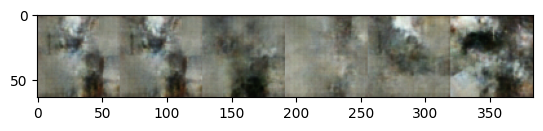

In [88]:
plt.imshow(image)

Text(0.5, 1.0, 'real next')

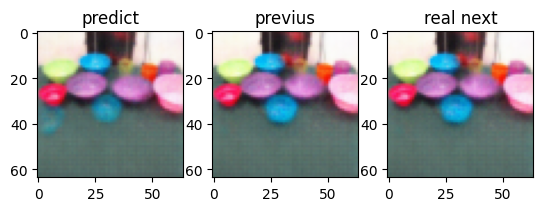

In [38]:
plt.subplot(1, 3, 1)
plt.imshow(a1[0])
plt.title("predict") 
plt.subplot(1, 3, 2)
plt.imshow(b1[0])
plt.title("previus") 
plt.subplot(1, 3, 3)
plt.imshow(c1[0])
plt.title("real next") 

# NEXT PREDICTION

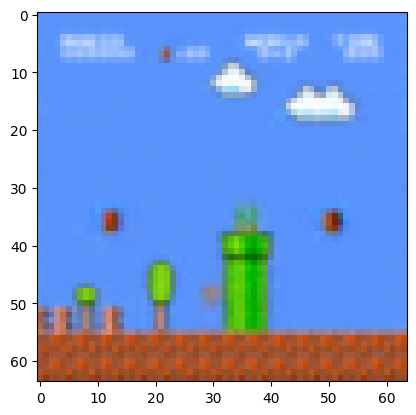

In [122]:
plt.imshow(a1[0])

# PREVIUS

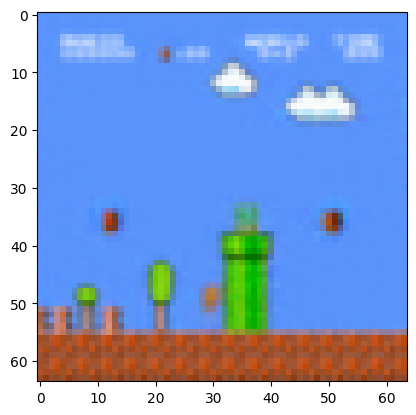

In [123]:
plt.imshow(b1[0])

# REAL NEXT CADR

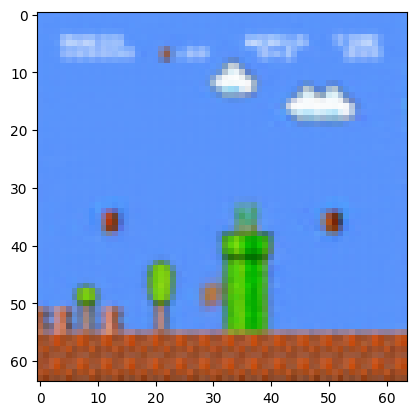

In [124]:
plt.imshow(c1[0])

In [120]:
torch.save(model, "RNN.pt")